In [79]:
import sys
sys.path.append('../../alg')
import distance_buffer as db

from shapely.geometry import Polygon
from shapely.geometry import LinearRing
from shapely.geometry import LineString
from shapely.geometry import Point

import numpy as np

from scipy.spatial.distance import euclidean

from math import sqrt
from math import floor
from matplotlib import pyplot
from matplotlib.patches import Circle
from descartes.patch import PolygonPatch

In [92]:
reload(db)

<module 'distance_buffer' from '../../alg/distance_buffer.pyc'>

In [93]:

## distance fig



targetArea = Polygon([(0,0),(0,400),(400,400),(400,0)],[[(101,74),(87,93),(99,119),(119,95)],[(200,70),(200,50),(300,20),(330,45),(370,45)]])
print targetArea.area


fig = pyplot.figure(1, dpi=90)
ax = fig.add_subplot(111)
db.plot_coords(ax, targetArea.interiors[0])
db.plot_coords(ax, targetArea.exterior)
patch = PolygonPatch(targetArea, facecolor='#6699cc', edgecolor='#6699cc', alpha=0.1, zorder=2)
ax.add_patch(patch)


## buffer fig
buffers = db.gen_dist_buffers(10.0, targetArea)
db.plot_dist_buffers(ax, buffers)

pts_buffer1 = db.find_cand_points_list(list(buffers[0].interiors[0].coords),10.0)
print pts_buffer1

#db.plot_coords_list(ax, pts_buffer1, color="#000000", zorder=3)



155778.0
num of buffers 11
 FIRST CNT 1
[23.600847442411894, -14.0, 19.0]
1
y = -1.35714285714*x + 211.071428571
[-1.3571428571428572, 211.07142857142858, 0]
101.0 74.0 87.0 93.0
[23.600847442411894, -14.0, 19.0]
[ 90.72549127  87.94397613]
 SEC CNT 2
90.725491271 87.9439761323 87.0 93.0
[23.600847442411894, -14.0, 19.0]
[  80.45098254  101.88795226]
 SEC CNT 3
80.4509825419 101.887952265 87.0 93.0
[23.600847442411894, -14.0, 19.0]
[ 90.72549127  87.94397613]
 SEC CNT 4
[(90.725491270966756, 87.943976132259394), (80.450982541933527, 101.8879522645188), (90.725491270966756, 87.943976132259394)]


In [94]:
db.plot_coords_list(ax, pts_buffer1, color="#000000", zorder=3)
db.

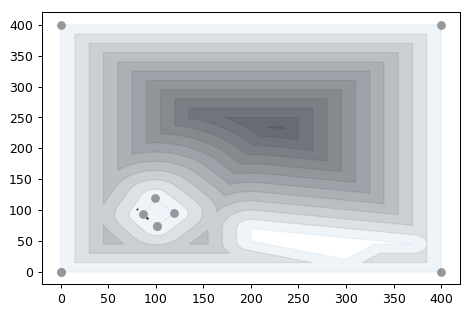

In [95]:
pyplot.show()